In [1]:
import pandas as pd

#load dataset
#df = pd.read_csv('training_set_VU_DM.csv')
df = pd.read_csv('test_set_VU_DM.csv')

In [2]:
# convert date to numerical feature 
df = df.sort_values(by="date_time")
df["date_time"] = (pd.to_datetime(df["date_time"]) - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")

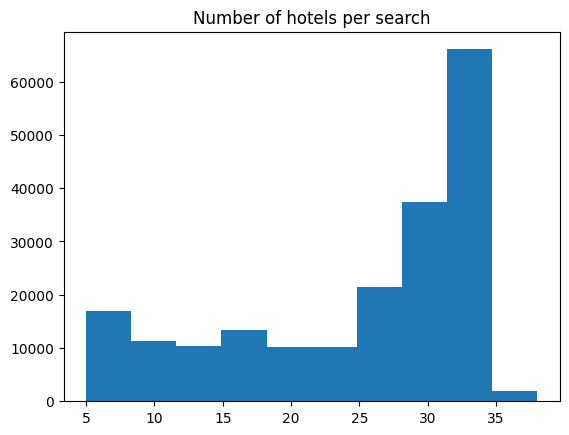

In [3]:
def list_to_dict_with_counts(input_list):
    # Create an empty dictionary to store counts of list items
    item_counts = {}

    # Iterate over each item in the input list
    for item in input_list:
        # Check if the item is already a key in the dictionary
        if item in item_counts:
            # If yes, increment the count for this item
            item_counts[item] += 1
        else:
            # If no, add the item as a new key with a count of 1
            item_counts[item] = 1

    return item_counts

search_id_dict = list_to_dict_with_counts(list(df['srch_id']))
import matplotlib.pyplot as plt

plt.hist(list(search_id_dict.values()))
plt.title('Number of hotels per search')
plt.show() 

In [4]:
import numpy as np

# calculate mean values to replace NaNs with 

lst_of_features = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2', 'srch_query_affinity_score','orig_destination_distance','comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff']

replacements = {}
for feature in lst_of_features:
    mean = np.mean(list(df[feature].dropna()))
    replacements[feature] = mean
    df[feature] = df[feature].fillna(mean)


In [5]:
df.describe()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
count,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,...,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06,4.959183e+06
mean,1.666460e+05,1.362989e+09,9.979214e+00,1.752504e+02,3.374933e+00,1.771507e+02,1.738371e+02,7.008111e+04,3.182542e+00,3.777628e+00,...,2.691095e+01,1.296166e-01,7.534702e-02,2.872014e+01,1.481524e-01,8.131677e-02,2.084640e+01,-6.054913e-02,9.815575e-03,2.399440e+01
std,9.614992e+04,5.930635e+06,7.667722e+00,6.590284e+01,1.564156e-01,2.483270e+01,6.835006e+01,4.061363e+04,1.049358e+00,1.050513e+00,...,4.194586e+02,1.239206e-01,6.944319e-02,5.054973e+02,1.461671e-01,8.464926e-02,3.093483e+01,2.906786e-01,1.283019e-01,3.489646e+02
min,1.000000e+00,1.351728e+09,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00
25%,8.331150e+04,1.358188e+09,5.000000e+00,1.000000e+02,3.374933e+00,1.771507e+02,1.000000e+02,3.502100e+04,3.000000e+00,3.500000e+00,...,2.691095e+01,1.296166e-01,7.534702e-02,2.872014e+01,1.481524e-01,8.131677e-02,2.084640e+01,-6.054913e-02,0.000000e+00,2.399440e+01
50%,1.670950e+05,1.363211e+09,5.000000e+00,2.190000e+02,3.374933e+00,1.771507e+02,2.190000e+02,6.960700e+04,3.000000e+00,4.000000e+00,...,2.691095e+01,1.296166e-01,7.534702e-02,2.872014e+01,1.481524e-01,8.131677e-02,2.084640e+01,-6.054913e-02,9.815575e-03,2.399440e+01
75%,2.499660e+05,1.368143e+09,1.400000e+01,2.190000e+02,3.374933e+00,1.771507e+02,2.190000e+02,1.051790e+05,4.000000e+00,4.500000e+00,...,2.691095e+01,1.296166e-01,7.534702e-02,2.872014e+01,1.481524e-01,8.131677e-02,2.084640e+01,0.000000e+00,9.815575e-03,2.399440e+01
max,3.327870e+05,1.372637e+09,3.400000e+01,2.310000e+02,5.000000e+00,2.768930e+03,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,...,2.693790e+05,1.000000e+00,1.000000e+00,1.125686e+06,1.000000e+00,1.000000e+00,3.021600e+04,1.000000e+00,1.000000e+00,1.449000e+05


In [6]:
df.to_csv('test_cleaned_nans_replaced.csv')

In [52]:
df.describe()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,...,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,1.362983e+09,9.953133e+00,1.753405e+02,3.374334e+00,1.760227e+02,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,...,1.725047e+01,1.459689e-01,8.320193e-02,1.943327e+01,-6.089936e-02,9.962752e-03,2.243038e+01,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,5.931460e+06,7.646890e+00,6.591625e+01,1.560799e-01,2.422681e+01,6.834525e+01,4.060992e+04,1.051024e+00,1.049548e+00,...,4.339703e+00,1.458160e-01,8.491644e-02,9.087397e+00,2.916995e-01,1.284688e-01,3.154750e+02,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.351729e+09,1.000000e+00,1.000000e+00,1.410000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,1.358186e+09,5.000000e+00,1.000000e+02,3.374334e+00,1.760227e+02,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,...,1.725047e+01,1.459689e-01,8.320193e-02,1.943327e+01,-6.089936e-02,0.000000e+00,2.243038e+01,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,1.363206e+09,5.000000e+00,2.190000e+02,3.374334e+00,1.760227e+02,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,...,1.725047e+01,1.459689e-01,8.320193e-02,1.943327e+01,-6.089936e-02,9.962752e-03,2.243038e+01,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.368144e+09,1.400000e+01,2.190000e+02,3.374334e+00,1.760227e+02,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,...,1.725047e+01,1.459689e-01,8.320193e-02,1.943327e+01,0.000000e+00,9.962752e-03,2.243038e+01,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,1.372637e+09,3.400000e+01,2.310000e+02,5.000000e+00,1.958700e+03,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,...,1.620000e+03,1.000000e+00,1.000000e+00,9.900000e+03,1.000000e+00,1.000000e+00,1.494000e+05,1.000000e+00,159292.380000,1.000000e+00


In [38]:

len(list(df[(df['srch_id'] == 81578)]['position']))

33

In [9]:
corr_matrix = df.corr()
corr_data = corr_matrix['booking_bool'].sort_values() 
corr_data

/var/folders/cg/rg2ypv352vx17hpxmvx6jg680000gn/T/ipykernel_8286/769830665.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


position                      -0.147918
random_bool                   -0.088891
srch_length_of_stay           -0.024412
srch_booking_window           -0.019582
comp1_inv                     -0.007850
comp3_inv                     -0.007438
comp7_inv                     -0.006155
comp6_inv                     -0.005906
srch_adults_count             -0.005376
orig_destination_distance     -0.003687
comp5_inv                     -0.003523
prop_location_score1          -0.003273
visitor_hist_starrating       -0.002044
comp4_inv                     -0.001961
comp3_rate_percent_diff       -0.001484
site_id                       -0.001354
comp5_rate_percent_diff       -0.001349
comp8_rate_percent_diff       -0.001304
comp2_inv                     -0.001019
prop_log_historical_price     -0.000807
prop_id                       -0.000508
comp8_inv                     -0.000422
comp4_rate_percent_diff       -0.000194
price_usd                      0.000067
srch_id                        0.000487


In [ ]:
df